In [129]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

# sin波とcos派で作成

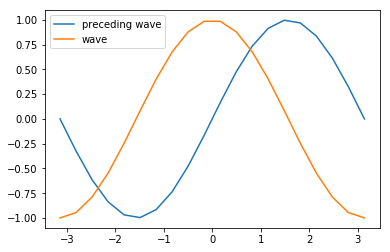

In [130]:

fig = plt.figure() 
ax = plt.axes()

x = np.linspace(-np.pi, np.pi, 20)
sin_wave = np.sin(x)
cos_wave = np.cos(x)
ax.plot(x, sin_wave , label = "preceding wave")
ax.plot(x, cos_wave, label = "wave")
plt.legend()
plt.show()

# DTWの実装

In [143]:
# 気をつける点
# https://medium.com/@shachiakyaagba_41915/dynamic-time-warping-with-time-series-1f5c05fb8950


def get_dtw_distance(x_vec, y_vec):
    
    x_length = len(x_vec) +1
    y_length = len(y_vec)+1 

    dtw_dis = np.full((x_length,y_length), np.inf)
    dtw_dis[0][0] = 0
    for i in range(1, x_length):
        for j in range(1, y_length):
            base_dis = abs(sin_wave[i-1] -  cos_wave[j-1])
            dtw_dis[i][j] = base_dis + min(dtw_dis[i-1][j-1],
                                           dtw_dis[i-1][j],
                                           dtw_dis[i][j-1])
    return dtw_dis[-1][-1]

In [144]:
get_dtw_distance(sin_wave, cos_wave )

6.441611700120721

In [145]:
import numpy as np

target_sig = np.random.normal(size=1000) * 1.0
delay = 800
sig1 = np.random.normal(size=2000) * 0.2
sig1[delay:delay+1000] += target_sig
sig2 = np.random.normal(size=2000) * 0.2
sig2[:1000] += target_sig

In [146]:
import numpy as np

corr = np.correlate(sig1, sig2, "full")
estimated_delay = corr.argmax() - (len(sig2) - 1)
print("estimated delay is " + str(estimated_delay))

estimated delay is 800


In [147]:
corr

array([-0.04873389,  0.04239892, -0.02645615, ...,  0.24884935,
       -0.34844394,  1.11643712])